In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import IIRrational.v2
from IIRrational.testing import IIRrational_data
from pyctrl import *

83


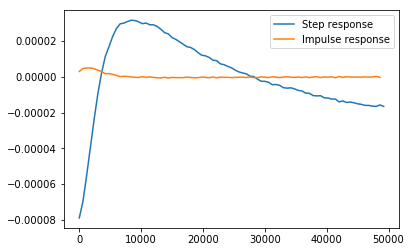

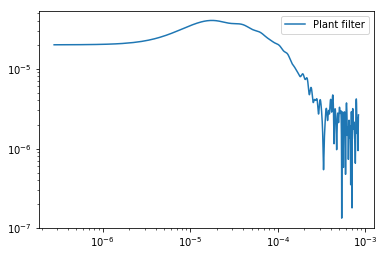

4.99370607029e-06


In [5]:
ITMYRH_data = np.loadtxt('/Users/daniel_vander-hyde/Documents/MATLAB/RH_time_constant_decrease/init_data/ITMY_trend_10min_int_longer.dat')
t = np.arange(0,len(ITMYRH_data[:,0][2:]))*60.0*10.0
normalize = 3.13
print(len(t))
data_in = ITMYRH_data[:,1][2:]
b, a = signal.butter(2, .2)
#data_new = signal.filtfilt(b,a,data_in)
data_new = data_in
plt.figure()
ir = (data_new[1:] - data_new[:-1])/normalize
ir_new = ir
plt.plot(t, data_new, label='Step response')
plt.plot(t[:(len(t)-1)], ir, label= 'Impulse response')
plt.legend()
plt.show()

Fs = 1/(t[2]-t[1])
#print(Fs)

[F,H]=signal.freqz(ir_new,1, worN=3000,whole=False) 
plt.figure()
plt.loglog(F*Fs/(2*np.pi), abs(H), label='Plant filter')
plt.legend()
plt.show()


#results = IIRrational.v2.data2filter(
#    data = abs(H),
#    F_Hz = F,
#)
print(max(ir_new))

In [6]:
np.max(ir)

4.9937060702875392e-06

/Users/daniel_vander-hyde/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


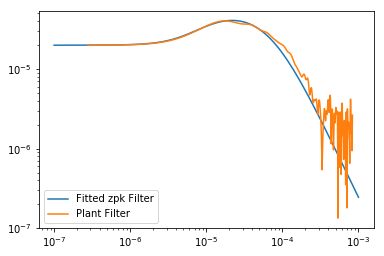

In [11]:
zeros = 5.0e-6
fit_zeros = -2.0*np.pi*5.0e-6
poles = [1.3e-5, 9.5e-5, 5.0e-5]
fit_poles = [-2.0*np.pi*p for p in poles]
factor = -2.0*np.pi

#s1 = signal.ZerosPolesGain(zeros, poles, 10e-5)

#w, h = signal.freqresp(s1)

#s1 = s1*abs(H[0])/abs(np.squeeze(signal.freqresp(s1,1)))

b_2, a_2 = signal.zpk2tf(zeros, poles,1)

[F_2,H_2] = signal.freqs(b_2, a_2)

plt.loglog(F_2, abs(H_2)/(H_2[0])*abs(H[0]), label='Fitted zpk Filter')
plt.loglog(F/(2*np.pi)*Fs, abs(H), label='Plant Filter')
plt.legend()
plt.show()


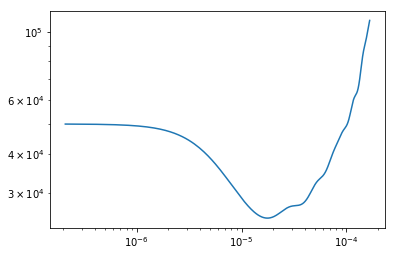

In [12]:
#Invert the plant filter

[F_3,H_3]=signal.freqz(1,ir_new, worN=4000,whole=False) 

plt.loglog(F_3[:-3200]/(2*np.pi)*Fs, abs(H_3[:-3200]), label = 'Inverted plant')

plt.show()

In [61]:
#Fitting to the inverse plant

results = IIRrational.v2.data2filter(
    data = H_3[:-3200],
    F_Hz = F_3[:-3200]*Fs,
    poles = [ -6.32844058505529e-05 + 0.00015576976518706052*1j, -6.32844058505529e-05 - 0.00015576976518706052*1j,
  -0.00030632838957629573 + 0.0009244849409484758*1j, -0.00030632838957629573 - 0.0009244849409484758*1j,
  -3.478120152298381e-05],
    zeros = [-7.485042721366561e-05 + 0.00015195597809321266*1j, -7.485042721366561e-05 - 0.00015195597809321266*1j,
  -0.00026690011018422387 + 0.0008263197608798485*1j, -0.00026690011018422387 - 0.0008263197608798485*1j,
  -0.00013793184811645843 + 4.1480771631213294e-05*1j, -0.00013793184811645843 - 4.1480771631213294e-05*1j],
    mode = 'fit'
)

3W   0.00  Estimating SNR from sample variance with nearby points (SNR_est_width > 0).
           This technique work semi-OK, but could probably be much better..
           use the resulting fit to estimate the sample variance and generate
           improved SNR estimates, iterate.
3W   0.01  21 SNR<1 element(s) dropped (of 800).
           Too many low SNR elements confuses the rational nonparametric fitter.
3W   0.02    The number of effective data points N=(ΣW^2)^2/(ΣW^4)=3.74e-02*len(W)
             [where W=SNR] is below the configured 'SNR_regularize_scale'=10,
             given the maximum SNR=79036.68379741299. Now Finding an SNR ceiling that balances
             the ratio with max SNR.


------------:SNR Fix Test:
2A   0.37  Baseline fit residuals: 5.24e+04, at order 6
------------:investigations:
2I   0.37    max(z, p)       ChiSq.
                   order    avg. res.    med. res.    max. res.
             -----------  -----------  -----------  -----------
                       6      52419.9      98260.4       225764


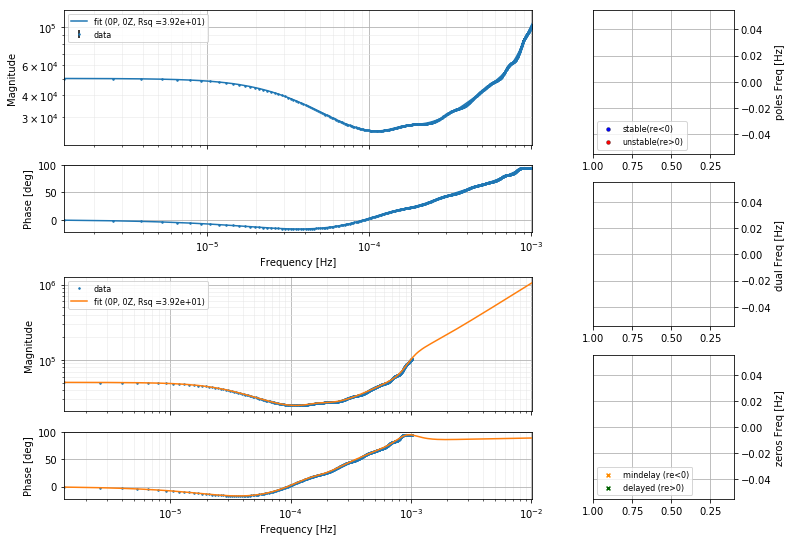

In [53]:
results.choose(5)
axB = results.investigate_fit_plot()
axB.save("myfit.pdf")

In [62]:
#Fitting to the inverse plant

results_2 = IIRrational.v2.data2filter(
    data = H_3[:-3200],
    F_Hz = F_3[:-3200]*Fs,
    poles_overlay = [ -6.32844058505529e-05 + 0.00015576976518706052*1j, -6.32844058505529e-05 - 0.00015576976518706052*1j,
  -0.00030632838957629573 + 0.0009244849409484758*1j, -0.00030632838957629573 - 0.0009244849409484758*1j,
  -3.478120152298381e-05],
    zeros_overlay = [-7.485042721366561e-05 + 0.00015195597809321266*1j, -7.485042721366561e-05 - 0.00015195597809321266*1j,
  -0.00026690011018422387 + 0.0008263197608798485*1j, -0.00026690011018422387 - 0.0008263197608798485*1j,
  -0.00013793184811645843 + 4.1480771631213294e-05*1j, -0.00013793184811645843 - 4.1480771631213294e-05*1j],
    mode = 'fit'
)

------------:SNR Fix Test:
2A   0.10  Baseline fit residuals: 3.92e+01, at order 6
------------:investigations:
2I   0.11    max(z, p)       ChiSq.
                   order    avg. res.    med. res.    max. res.
             -----------  -----------  -----------  -----------
                       6      39.1944      58.3404      201.435


3W   0.00  Estimating SNR from sample variance with nearby points (SNR_est_width > 0).
           This technique work semi-OK, but could probably be much better..
           use the resulting fit to estimate the sample variance and generate
           improved SNR estimates, iterate.
3W   0.00  21 SNR<1 element(s) dropped (of 800).
           Too many low SNR elements confuses the rational nonparametric fitter.
3W   0.01    The number of effective data points N=(ΣW^2)^2/(ΣW^4)=3.74e-02*len(W)
             [where W=SNR] is below the configured 'SNR_regularize_scale'=10,
             given the maximum SNR=79036.68379741299. Now Finding an SNR ceiling that balances
             the ratio with max SNR.


In [56]:
axB = results_2.investigate_fit_plot()

NameError: name 'results_2' is not defined

In [35]:
print(results.as_foton_str_ZPKsf())

ZPK([
  -7.485042721366561e-05 + 0.00015195597809321266*i; -7.485042721366561e-05 - 0.00015195597809321266*i;
  -0.00026690011018422387 + 0.0008263197608798485*i; -0.00026690011018422387 - 0.0008263197608798485*i;
  -0.00013793184811645843 + 4.1480771631213294e-05*i; -0.00013793184811645843 - 4.1480771631213294e-05*i;
],[
  -6.32844058505529e-05 + 0.00015576976518706052*i; -6.32844058505529e-05 - 0.00015576976518706052*i;
  -0.00030632838957629573 + 0.0009244849409484758*i; -0.00030632838957629573 - 0.0009244849409484758*i;
  -3.478120152298381e-05;
], 16611628.28274043, "f")


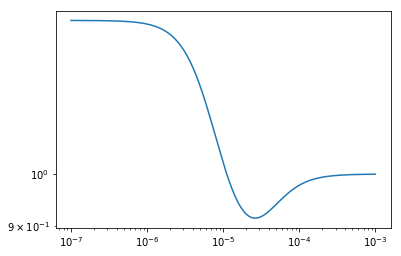

In [8]:
b_3, a_3 = signal.zpk2tf([35.34e-6,10.868e-6,39.211e-6], [6.468e-6,41.5923e-6,40.8706e-6],1)
[F_4,H_4] = signal.freqs(b_3, a_3)
plt.loglog(F_4,abs(H_4))

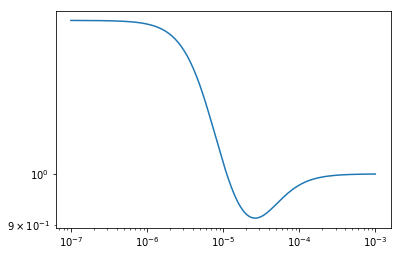

In [9]:
b_3, a_3 = signal.zpk2tf([35.34e-6,10.868e-6,39.211e-6], [6.468e-6,41.2411998713e-6,41.2411998713e-6],1)
[F_4,H_4] = signal.freqs(b_3, a_3)
plt.loglog(F_4,abs(H_4))

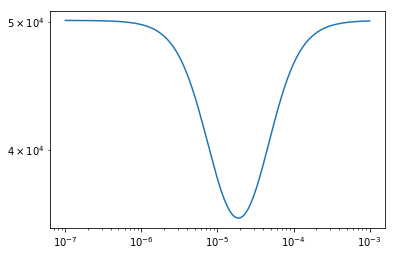

In [10]:
zeros_new = [35.34e-6,10.868e-6,39.211e-6]
poles_new = [6.468e-6,48.2533e-6,48.2533e-6]
gain_new = 107723189
b_3, a_3 = signal.zpk2tf(zeros_new, poles_new, 1/H[0])
[F_4,H_4] = signal.freqs(b_3, a_3)
plt.loglog(F_4,abs(H_4))

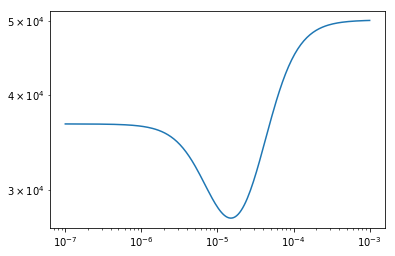

In [11]:
zeros_new = [31.8157e-6,31.8157e-6, 10.868e-6]
poles_new = [6.468e-6,48.2533e-6,48.2533e-6]
gain_new = 107723189 
b_3, a_3 = signal.zpk2tf(zeros_new, poles_new, 1/H[0])
[F_4,H_4] = signal.freqs(b_3, a_3)
plt.loglog(F_4,abs(H_4))

In [12]:
#lens_step = 10e-6
t_inv ,Inv_step = signal.step([b_3, a_3], T=t)

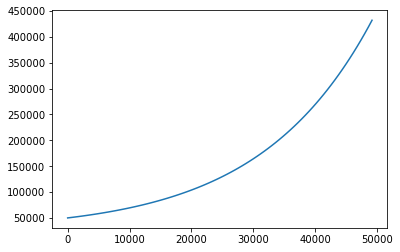

In [13]:
plt.plot(t_inv,Inv_step)